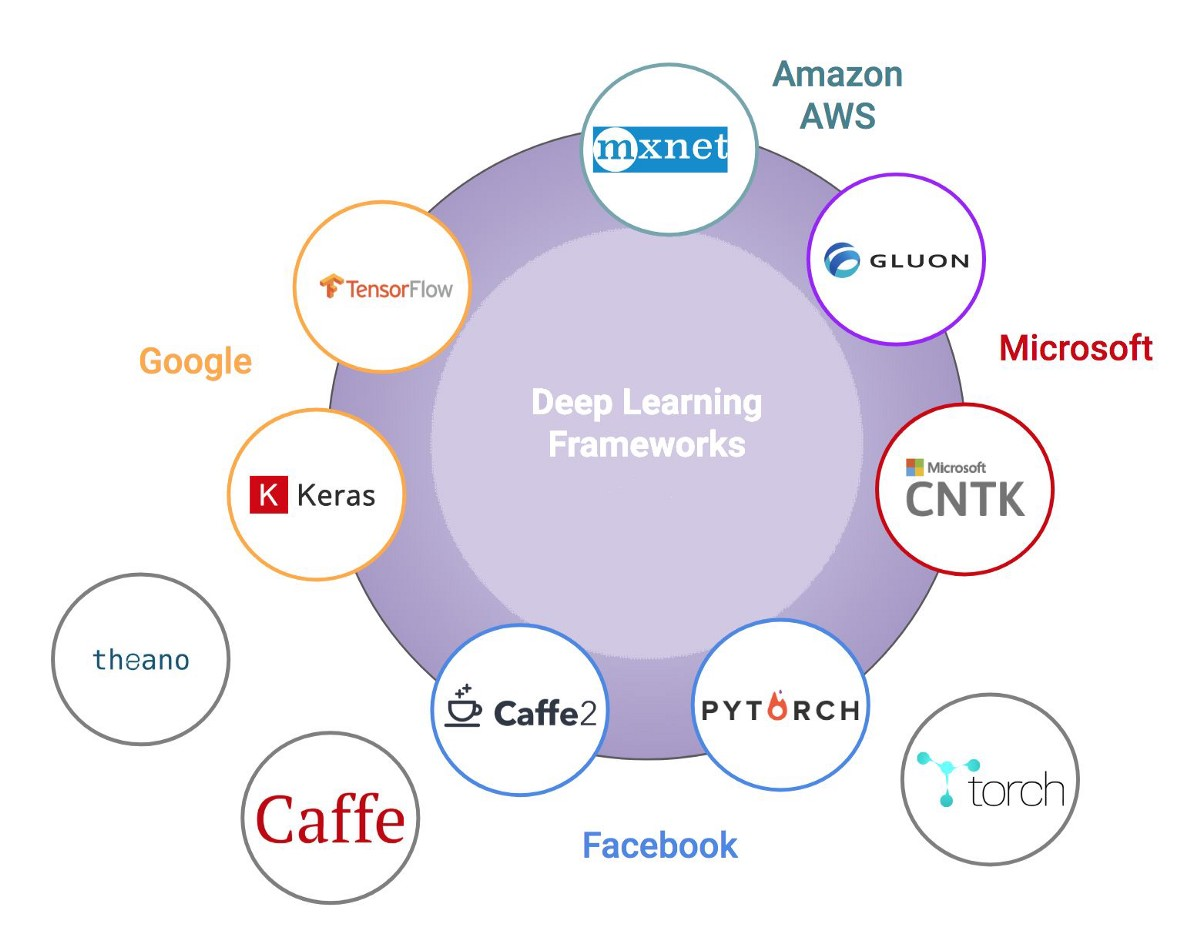

# Част 1. ОСНОВНИ ОПЕРАЦИИ С PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [ ]:
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
x

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

In [ ]:
x[0][0] = 5
x

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

In [ ]:
torch.zeros(2,2,2)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [ ]:
torch.ones(1,2) + torch.ones(1,2)

tensor([[2., 2.]])

In [ ]:
a = torch.ones(1,2)
b = torch.zeros_like(x)
print(b)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


.item() returns the value of this tensor as a standard Python number. This only works for tensors with one element. For other cases, see tolist().



In [ ]:
torch.rand(1).item()

0.9502692222595215

In [ ]:
cpu_tensor = torch.rand(2)
cpu_tensor.device

device(type='cpu')

In [ ]:
gpu_tensor = cpu_tensor.to("cuda")
gpu_tensor.device

device(type='cuda', index=0)

In [ ]:
torch.rand(2,2).max()

tensor(0.8245)

In [ ]:
torch.rand(2,2).max().item()

0.7099437713623047

In [ ]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])

In [ ]:
float_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]]).to(dtype=torch.float32)

In [ ]:
float_tensor.to("cuda").type()

'torch.cuda.FloatTensor'

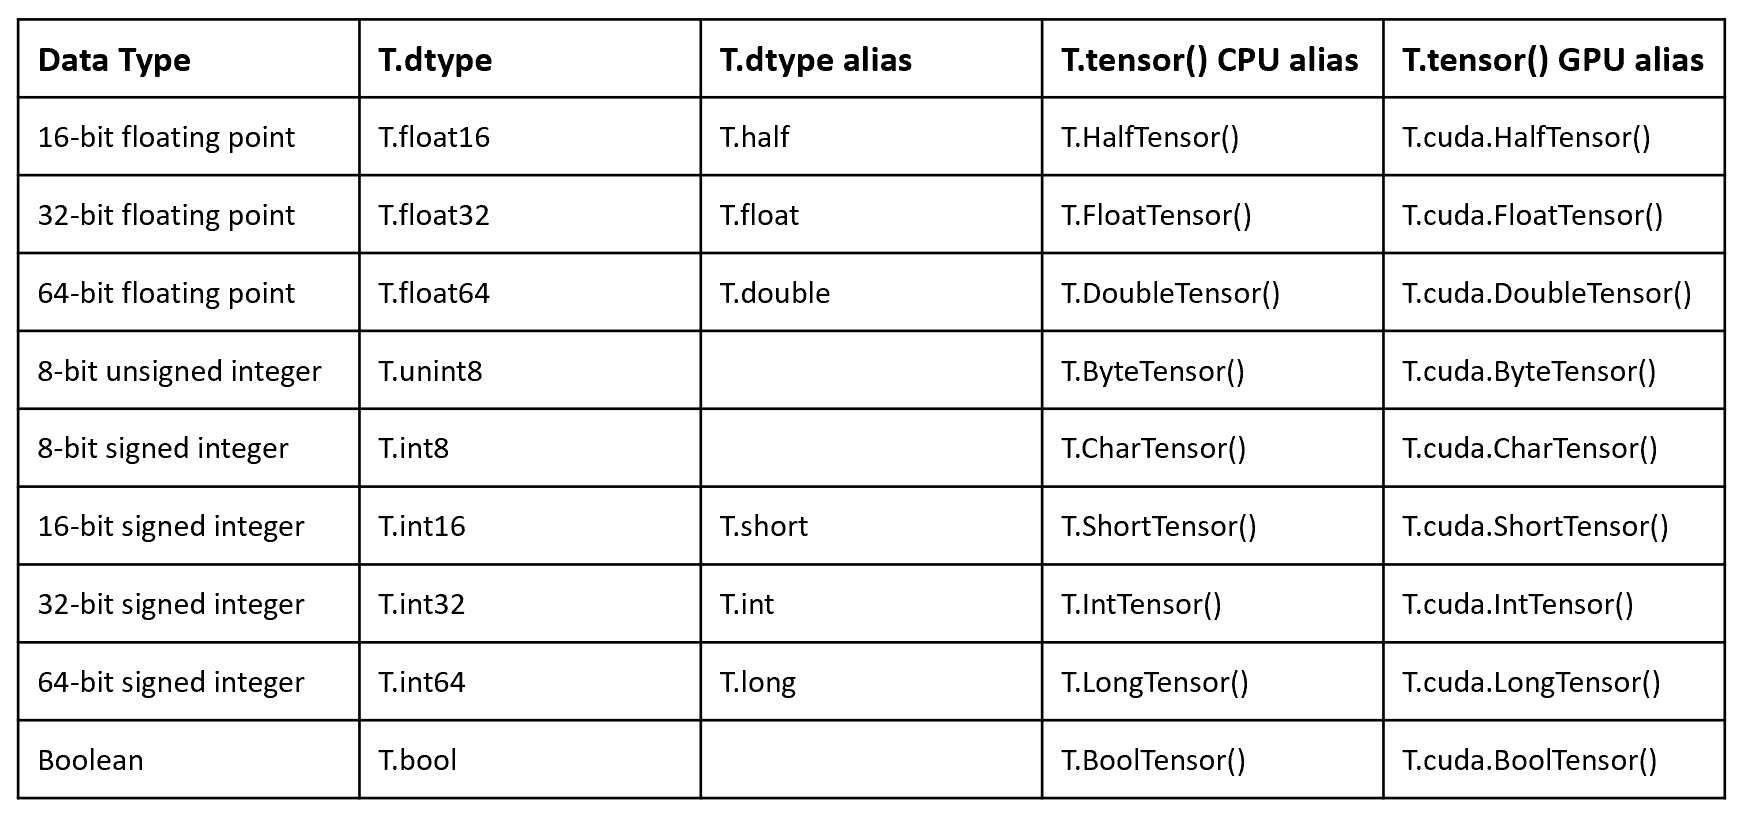

In [ ]:
random_tensor = torch.rand(2,2)

In [ ]:
random_tensor

tensor([[0.5941, 0.6294],
        [0.9818, 0.3802]])

In [ ]:
random_tensor.log2()

tensor([[-0.7513, -0.6679],
        [-0.0265, -1.3952]])

In [ ]:
random_tensor

tensor([[0.5941, 0.6294],
        [0.9818, 0.3802]])

In [ ]:
random_tensor.log2_()

tensor([[-0.7513, -0.6679],
        [-0.0265, -1.3952]])

In [ ]:
random_tensor

tensor([[-0.2806, -2.7654],
        [-0.3672, -1.5413]])

In [ ]:
flat_tensor = torch.rand(784)

In [ ]:
viewed_tensor = flat_tensor.view(1,28,28)
viewed_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
reshaped_tensor = flat_tensor.reshape(1,28,28)
reshaped_tensor.shape

torch.Size([1, 28, 28])

`reshape` и `view` са почти идентични. `reshape` дава възможност да се направи дубликат на масив, докато при `view` данните се споделят .

In [ ]:
hwc_tensor = torch.rand(640, 480, 3)
chw_tensor = hwc_tensor.permute(2,0,1)
chw_tensor.shape

torch.Size([3, 640, 480])

# Част 2. Намиране на производни с PyTorch. Модулът autograd

Autograd запазва в насочен граф без цикли (DAG) информация за данните ( в тензори) и изпълнените операции. В този граф, листата са входните вектори, а „корена“ - изходните вектори.



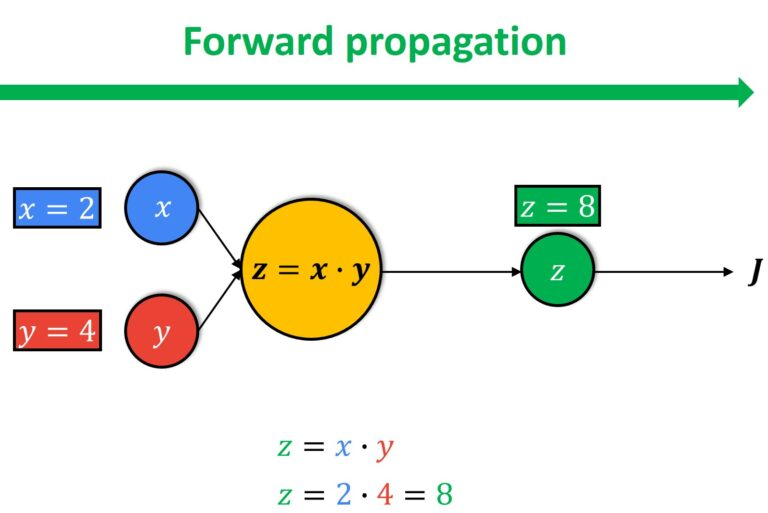

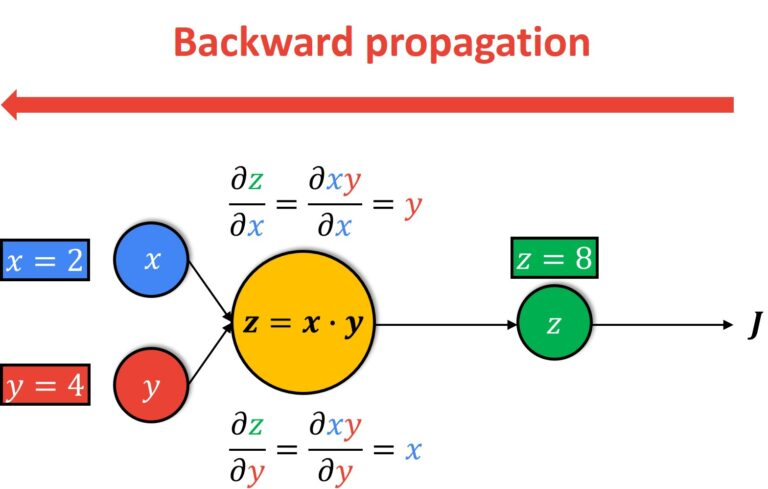

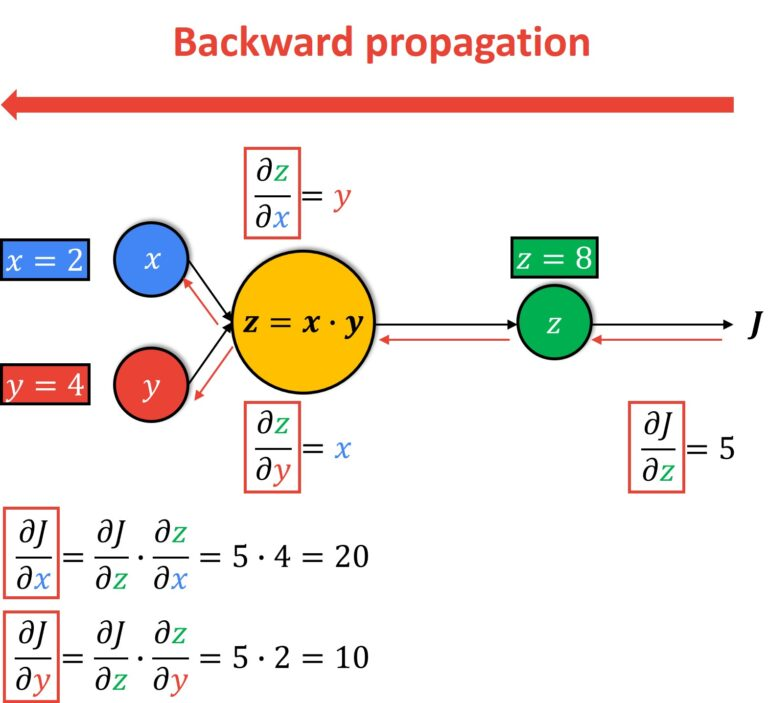

https://www.youtube.com/watch?v=j1-r1vO2a_o

https://www.youtube.com/watch?v=LjdiVPQ45GE

https://www.youtube.com/watch?v=oY6-i2Ybin4 L6.2 Understanding Automatic Differentiation via Computation Graphs

https://www.youtube.com/watch?v=VvUz0Q9e09g L6.3 Automatic Differentiation in PyTorch -- Code Example



## 2.1. Пример 1. Скаларна функция със скаларен аргумент

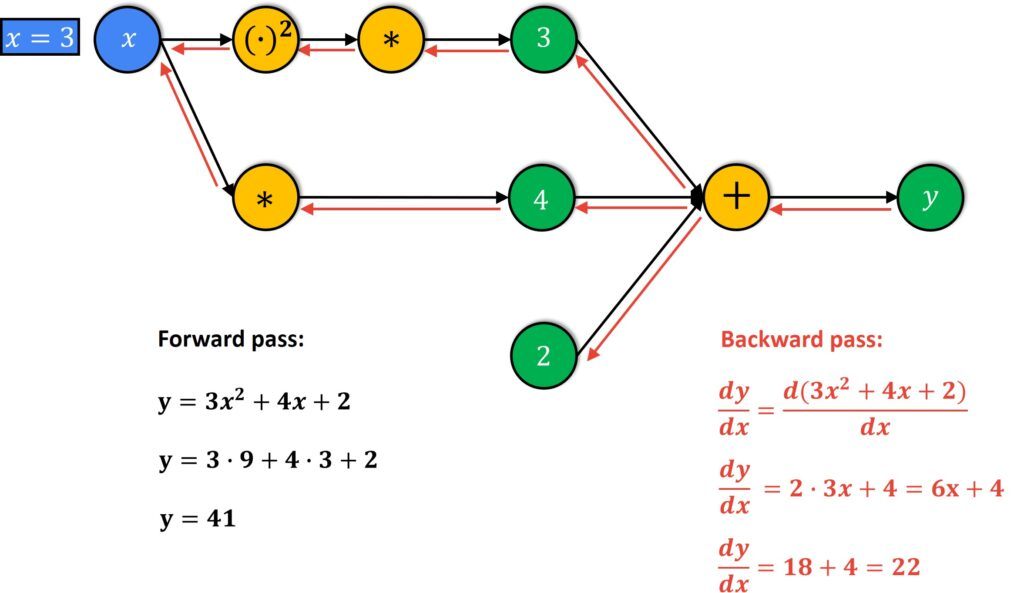

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
x = torch.tensor(3., requires_grad=True) # True ако ще изчисляваме производна d/dx

y = 3*x**2 + 4*x + 2
print(y)

tensor(41., grad_fn=<AddBackward0>)


In [ ]:
y.backward()
print(x.grad)
#print(y.grad)

tensor(22.)


## Пример 2.2 Скаларна функция с векторен аргумент

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x.sum()
y.backward() #is equivalent to y.backward(torch.tensor(1.))
print(x.grad)
#out: tensor([1., 1., 1.])

tensor([ 0.7155, -1.0736, -0.0531], requires_grad=True)
tensor([1., 1., 1.])


## Пример 2.3. Векторна функция с векторен аргумент

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x ** 2
print(y)
#while y.data.norm() < 1000:
#    y = y * 2
v = torch.tensor([1, 1, 1], dtype=torch.float) # = torch.tensor([1, 1, 1], dtype=torch.float)
y.backward(v)
#y.backward()
print(x.grad)

tensor([2.0381, 0.5376, 0.3777], requires_grad=True)
tensor([4.1539, 0.2891, 0.1426], grad_fn=<PowBackward0>)
tensor([4.0762, 1.0753, 0.7553])


In [ ]:
import torch
from IPython.display import display, Math
# Define the graph a,b,c,d are leaf nodes and e is the root node
# The graph is constructed with every line since the
# computational graphs are dynamic in PyTorch
a = torch.tensor([2.0],requires_grad=True)
b = torch.tensor([3.0],requires_grad=True)
c = torch.tensor([5.0],requires_grad=True)
d = torch.tensor([10.0],requires_grad=True)
u = a*b
t = torch.log(d)
v = t*c
t.retain_grad()
e = u+v

## Част 2.4 Производни в невронни мрежи

### Част 2.4.1 Производни в невронна мрежа с един слой

In [ ]:
import torch
import torch.nn as nn
import numpy as np
# torch.manual_seed(0)

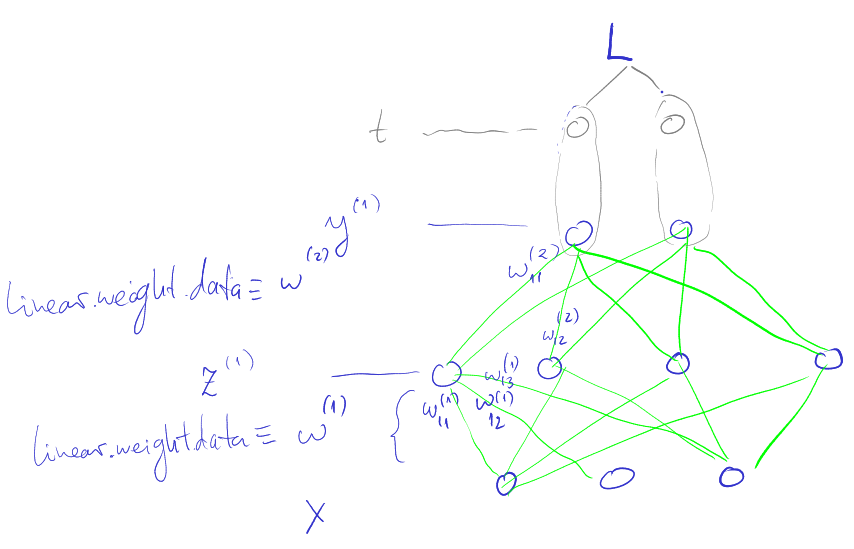

In [ ]:
linear1 = nn.Linear(3, 4)
act_fn1 = nn.ReLU()
linear2 = nn.Linear(4, 2)
act_fn2 = nn.Sigmoid()

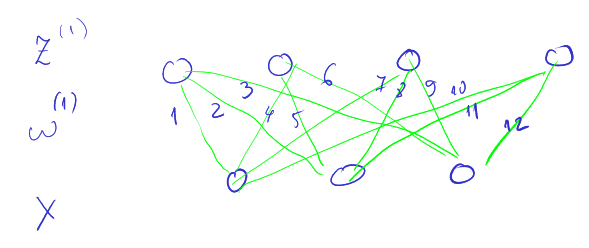

In [ ]:
linear1.weight.data = torch.tensor(np.arange(1, 13).reshape((4,3))).float()
print(linear1.weight)
linear1.bias.data = torch.zeros_like(linear1.bias.data).float()
print(linear1.bias)

Parameter containing:
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)


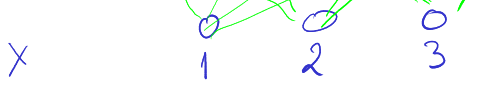

In [ ]:
x = torch.tensor([[1.,2.,3.]], requires_grad=True)
a1 = linear1(x)
z1 = act_fn1(a1)
print(a1)
print(z1)
print(z1.shape)

tensor([[14., 32., 50., 68.]], grad_fn=<AddmmBackward0>)
tensor([[14., 32., 50., 68.]], grad_fn=<ReluBackward0>)
torch.Size([1, 4])


In [ ]:
external_grad = torch.ones_like(z1) * 0.5
z1.backward(gradient = external_grad)

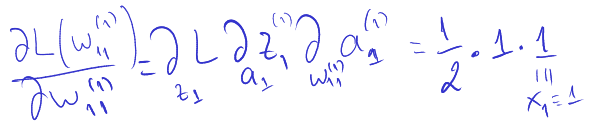

In [ ]:
print(linear1.weight.grad)

tensor([[0.5000, 1.0000, 1.5000],
        [0.5000, 1.0000, 1.5000],
        [0.5000, 1.0000, 1.5000],
        [0.5000, 1.0000, 1.5000]])


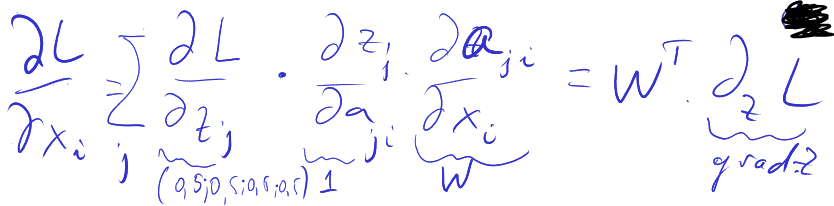

In [ ]:
print(x.grad)

tensor([[11., 13., 15.]])


### 4.2.2 Производни в невронна мрежа - два слоя с оценъчна функция

In [ ]:
linear1 = nn.Linear(3, 4)
act_fn1 = nn.ReLU()
linear2 = nn.Linear(4,2)
act_fn2 = nn.Sigmoid()

Инициализиране на теглата

In [ ]:
linear1.weight.data = torch.tensor(np.arange(1, 13).reshape((4,3))).float()
linear1.bias.data = torch.zeros_like(linear1.bias.data).float()
linear2.weight.data = torch.zeros_like(linear2.weight.data).float()
linear2.bias.data = torch.zeros_like(linear2.bias.data).float()

Изчисляване на стойностите в невроните

In [ ]:
x = torch.tensor([[1.,2.,3.]], requires_grad=True)
a1 = linear1(x)
z1 = act_fn1(a1)
a2 = linear2(z1)
y = act_fn2(a2)

In [ ]:
print(z1)
print(y)

tensor([[14., 32., 50., 68.]], grad_fn=<ReluBackward0>)
tensor([[0.5000, 0.5000]], grad_fn=<SigmoidBackward0>)


запазваме „градиентите" в паметта. Това е необходимо да се направи изрично ако искаме да разгледаме стойностите им след процедурата на диференцирането.

In [ ]:
a2.retain_grad()
z1.retain_grad()
linear1.weight.retain_grad()

задаване на градиент във втория слой

In [ ]:
print(linear2.weight.grad)

tensor([[1.7500, 4.0000, 6.2500, 8.5000],
        [1.7500, 4.0000, 6.2500, 8.5000]])


In [ ]:
print(linear1.weight.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


Добавяне на оценъчна функция

In [ ]:
t = torch.zeros_like(y).float()

In [ ]:
loss = nn.MSELoss()
L = loss(y, t)

In [ ]:
print(L)

tensor(0.2500, grad_fn=<MseLossBackward0>)


In [ ]:
L.backward()

In [ ]:
linear2.weight.grad

tensor([[1.7500, 4.0000, 6.2500, 8.5000],
        [1.7500, 4.0000, 6.2500, 8.5000]])

In [ ]:
y.grad

<ipython-input-42-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [ ]:
z1.grad

Създаване и оптимизиране на невронната мрежа от лекция 2

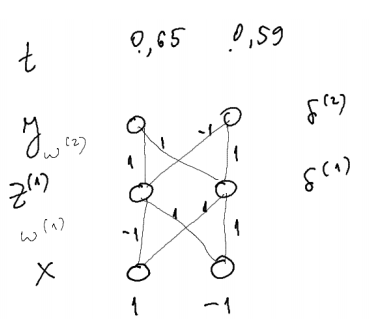

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
linear1 = nn.Linear(2, 2)
act_fn1 = nn.Sigmoid()
linear2 = nn.Linear(2, 2)
act_fn2 = nn.Sigmoid()

In [ ]:
def sigmoid(x):
  return 1./(1+np.exp(-x))

In [ ]:
sigmoid(0.38)

np.float64(0.5938731029341427)

In [ ]:
linear1.weight.data = torch.tensor(np.array([-1,1,1,1]).reshape((2, 2))).float()
linear1.bias.data = torch.zeros_like(linear1.bias.data).float()
linear2.weight.data = torch.tensor(np.array([1,1,-1,1]).reshape((2, 2))).float()
linear2.bias.data = torch.zeros_like(linear2.bias.data).float()

In [ ]:
x = torch.tensor([1., -1.])
a1 = linear1(x)
z1 = act_fn1(a1)
z1.retain_grad()
a2 = linear2(z1)
y = act_fn2(a2)
#t = torch.empty(1, dtype=torch.long).random_(1)
t = torch.tensor([0.67,0.598]).float()

In [ ]:
print(y)
print(t)
print(z1)
print(t-y)


tensor([0.6500, 0.5941], grad_fn=<SigmoidBackward0>)
tensor([0.6700, 0.5980])
tensor([0.1192, 0.5000], grad_fn=<SigmoidBackward0>)
tensor([0.0200, 0.0039], grad_fn=<SubBackward0>)


https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

In [ ]:
loss = nn.MSELoss()
L = loss(y, t)

In [ ]:
print(L)

tensor(0.0002, grad_fn=<MseLossBackward0>)


In [ ]:
L.backward()

In [ ]:
linear2.weight.grad

tensor([[-0.0005, -0.0023],
        [-0.0001, -0.0005]])

In [ ]:
linear1.weight.grad

tensor([[-0.0004,  0.0004],
        [-0.0014,  0.0014]])

In [ ]:
z1.grad

tensor([-0.0036, -0.0055])

на torch.optim му е нужен model. За това вкарваме всички трансформации в model

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 2),
    nn.Sigmoid() )

In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        layer.weight.data = torch.tensor(np.array([-1,1,1,1]).reshape((2, 2))).float()
        layer.bias.data = torch.zeros_like(linear1.bias.data).float()
    elif num == 2:
        layer.weight.data = torch.tensor(np.array([1,1,-1,1]).reshape((2, 2))).float()
        layer.bias.data = torch.zeros_like(linear1.bias.data).float()

In [ ]:
y = model(x)
print(y)
t = torch.tensor([0.67,0.598]).float()
print(t)

tensor([0.6500, 0.5941], grad_fn=<SigmoidBackward0>)
tensor([0.6700, 0.5980])


In [ ]:
loss = nn.MSELoss()
L = loss(y, t)
L.backward()

In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        print(layer.weight.grad)
    elif num == 2:
        print(layer.weight.grad)

tensor([[-0.0004,  0.0004],
        [-0.0014,  0.0014]])
tensor([[-0.0005, -0.0023],
        [-0.0001, -0.0005]])


In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
optim.step()

In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        print(layer.weight)
    elif num == 2:
        print(layer.weight)

Parameter containing:
tensor([[-1.0000,  1.0000],
        [ 1.0001,  0.9999]], requires_grad=True)
Parameter containing:
tensor([[ 1.0001,  1.0002],
        [-1.0000,  1.0000]], requires_grad=True)


In [ ]:
y = model(x)
L = loss(y, t)
optim.zero_grad()
L.backward()
optim.step()

In [ ]:
y

tensor([0.6500, 0.5941], grad_fn=<SigmoidBackward0>)

In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        print(layer.weight)
    elif num == 2:
        print(layer.weight)

Parameter containing:
tensor([[-1.0000,  1.0000],
        [ 1.0001,  0.9999]], requires_grad=True)
Parameter containing:
tensor([[ 1.0001,  1.0002],
        [-1.0000,  1.0000]], requires_grad=True)


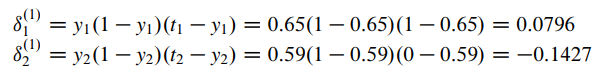

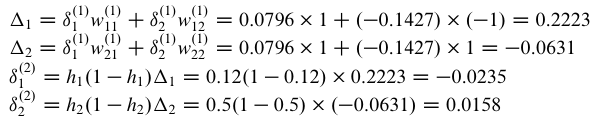

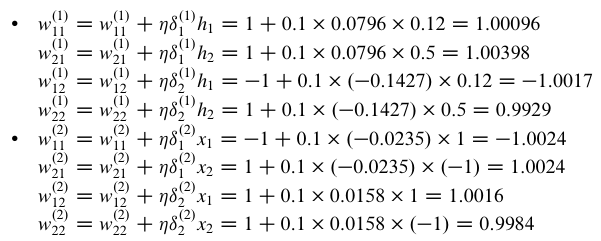

## Част 2.5 Упражнение по производни в невронна мрежа

https://www.anotsorandomwalk.com/backpropagation-example-with-numbers-step-by-step/

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
model = nn.Sequential(
    nn.Linear(3, 2),
    nn.Sigmoid(),
    nn.Linear(2, 2),
    nn.Sigmoid() )

In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        layer.weight.data = torch.tensor(np.array([0.1,0.3,0.5,0.2,0.4,0.6]).reshape((2, 3))).float()
        layer.bias.data = 0.5*torch.ones_like(layer.bias.data).float()
    elif num == 2:
        layer.weight.data = torch.tensor(np.array([0.7,0.9,0.8,0.1]).reshape((2, 2))).float()
        layer.bias.data = 0.5*torch.ones_like(layer.bias.data).float()

In [ ]:
x = torch.tensor([1., 4., 5.])
y = model(x)
print(y)
t = torch.tensor([0.1,0.05]).float()
print(t)

tensor([0.8896, 0.8004], grad_fn=<SigmoidBackward0>)
tensor([0.1000, 0.0500])


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

In [ ]:
loss = nn.MSELoss()

In [ ]:
L = loss(y, t)
L.backward()

In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        print(layer.weight.grad)
    elif num == 2:
        print(layer.weight.grad)

tensor([[0.0020, 0.0079, 0.0099],
        [0.0004, 0.0016, 0.0020]])
tensor([[0.0765, 0.0772],
        [0.1183, 0.1193]])


In [ ]:
optimizer.step()

In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        print(layer.weight.data)
    elif num == 2:
        print(layer.weight.data)

tensor([[0.1000, 0.2999, 0.4999],
        [0.2000, 0.4000, 0.6000]])
tensor([[0.6992, 0.8992],
        [0.7988, 0.0988]])


In [ ]:
optimizer.zero_grad()

In [ ]:
for iter in range(3050):
    y = model(x)
    L = loss(y, t)
    optimizer.zero_grad()
    L.backward()
    optimizer.step()
print(L.item())

1.896462526929099e-05


In [ ]:
for num, layer in enumerate(model.children()):
    if num == 0:
        print(layer.weight)
    elif num == 2:
        print(layer.weight)

Parameter containing:
tensor([[0.0982, 0.2928, 0.4910],
        [0.2028, 0.4111, 0.6139]], requires_grad=True)
Parameter containing:
tensor([[-0.7209, -0.5393],
        [-0.5983, -1.3155]], requires_grad=True)


#Част 3. Класификация на изображения

## Сваляне на данни и зареждането им в PyTorch

In [ ]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#    -O cats_and_dogs_filtered.zip

In [ ]:
!wget --no-check-certificate \
    https://indico.iaps.institute/event/14/attachments/12/75/cat-and-fish-images-for-classifier.zip \
    -O cat-and-fish-images-for-classifier.zip

--2024-06-30 12:15:05--  https://indico.iaps.institute/event/14/attachments/12/75/cat-and-fish-images-for-classifier.zip
Resolving indico.iaps.institute (indico.iaps.institute)... 13.38.78.210
Connecting to indico.iaps.institute (indico.iaps.institute)|13.38.78.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69682617 (66M) [application/zip]
Saving to: ‘cat-and-fish-images-for-classifier.zip’

cat-and-fish-images 100%[===================>]  66.45M  16.3MB/s    in 4.1s    

2024-06-30 12:15:10 (16.3 MB/s) - ‘cat-and-fish-images-for-classifier.zip’ saved [69682617/69682617]



In [ ]:
!unzip cat-and-fish-images-for-classifier.zip


Archive:  cat-and-fish-images-for-classifier.zip
   creating: cat-and-fish-images-for-classifier/
  inflating: cat-and-fish-images-for-classifier/images.csv  
   creating: cat-and-fish-images-for-classifier/test/
  inflating: cat-and-fish-images-for-classifier/download.py  
   creating: cat-and-fish-images-for-classifier/train/
  inflating: cat-and-fish-images-for-classifier/clean.sh  
  inflating: cat-and-fish-images-for-classifier/download.sh  
   creating: cat-and-fish-images-for-classifier/val/
   creating: cat-and-fish-images-for-classifier/test/cat/
   creating: cat-and-fish-images-for-classifier/test/fish/
   creating: cat-and-fish-images-for-classifier/train/cat/
   creating: cat-and-fish-images-for-classifier/train/fish/
   creating: cat-and-fish-images-for-classifier/val/cat/
   creating: cat-and-fish-images-for-classifier/val/fish/
  inflating: cat-and-fish-images-for-classifier/test/cat/300581891_e9a14e195a.jpg  
  inflating: cat-and-fish-images-for-classifier/test/cat/2156

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [ ]:
class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

In [ ]:
from google.colab import drive
drive.mount('/content/train')

Mounted at /content/train


In [ ]:
import torchvision
from torchvision import transforms

train_data_path = "cat-and-fish-images-for-classifier/train/"

transforms = transforms.Compose([
    transforms.Resize((64, 64)), #Scale each image to the same resolution 64 * 64
    transforms.ToTensor(), #Convert the image into a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], #Normalize according to the specific mean value
                    std=[0.229, 0.224, 0.225] )
    ])

train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=transforms)

In [ ]:
val_data_path = "cat-and-fish-images-for-classifier/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path, transform=transforms)

In [ ]:
test_data_path = "cat-and-fish-images-for-classifier/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=transforms)

In [ ]:
batch_size = 500
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader  = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

## Невронна мрежа

In [ ]:
class SimpleNet(nn.Module):

  def __init__(self):
      super(SimpleNet, self).__init__()
      self.fc1 = nn.Linear(12288, 84)
      self.fc2 = nn.Linear(84, 50)
      self.fc3 = nn.Linear(50,2)

  def forward(self, x):
      x = x.view(-1, 12288)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.softmax(self.fc3(x))
      return x

simplenet = SimpleNet()


## Обучаване на мрежата

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device=torch.device("cpu")):
    for epoch in range(1, epochs + 1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)

        model.eval()
        num_correct = 0
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output, targets)
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print(
            'Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss, valid_loss,
                                                                                                  num_correct / num_examples))

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("cuda")
else:
    device = torch.device("cpu")
    print("cpu")
simplenet.to(device)
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=55, device=device)

cuda


<ipython-input-60-eae2de290d0d>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


Epoch: 1, Training Loss: 0.59, Validation Loss: 0.76, accuracy = 0.53
Epoch: 2, Training Loss: 0.58, Validation Loss: 0.79, accuracy = 0.48
Epoch: 3, Training Loss: 0.58, Validation Loss: 0.77, accuracy = 0.52
Epoch: 4, Training Loss: 0.57, Validation Loss: 0.73, accuracy = 0.58
Epoch: 5, Training Loss: 0.55, Validation Loss: 0.72, accuracy = 0.59
Epoch: 6, Training Loss: 0.53, Validation Loss: 0.71, accuracy = 0.58
Epoch: 7, Training Loss: 0.52, Validation Loss: 0.70, accuracy = 0.60
Epoch: 8, Training Loss: 0.51, Validation Loss: 0.68, accuracy = 0.62
Epoch: 9, Training Loss: 0.50, Validation Loss: 0.67, accuracy = 0.64
Epoch: 10, Training Loss: 0.49, Validation Loss: 0.66, accuracy = 0.65
Epoch: 11, Training Loss: 0.48, Validation Loss: 0.65, accuracy = 0.66
Epoch: 12, Training Loss: 0.47, Validation Loss: 0.64, accuracy = 0.66
Epoch: 13, Training Loss: 0.46, Validation Loss: 0.63, accuracy = 0.66
Epoch: 14, Training Loss: 0.45, Validation Loss: 0.63, accuracy = 0.67
Epoch: 15, Trai

In [ ]:
!rm cat-and-fish-images-for-classifier/val/fish/AhappygroupwithsomeniceCohoSalmonsm.jpg

rm: cannot remove 'cat-and-fish-images-for-classifier/val/fish/AhappygroupwithsomeniceCohoSalmonsm.jpg': No such file or directory


## Прогнозиране

In [ ]:
from PIL import Image

In [ ]:
labels = ['cat','fish']
import os
i =0
j =0
device = "cuda"
for root, dirs, files in os.walk("cat-and-fish-images-for-classifier/test/cat"):
    for file in files:
        j+=1
        img = Image.open("cat-and-fish-images-for-classifier/test/cat/"+file)
        img = transforms(img).to(device)
        img = torch.unsqueeze(img, 0)

        simplenet.eval()
        prediction = F.softmax(simplenet(img), dim=1)
        prediction = prediction.argmax()
        if(labels[prediction]=="cat"):
            i+=1
print(i/j)

<ipython-input-60-eae2de290d0d>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


0.7472527472527473
